In [2]:
import boto3
import pandas as pd
import io

s3 = boto3.resource('s3')
bucket_name = 'apacdlcdc-rms-ted-sample'
file_key = 'lifecycle/LVYPDBMDXMP201289/LVYPDBMDXMP201289_merged.csv'

### Process original csv file to designed dataframe

In [3]:
df = pd.read_csv(f's3://{bucket_name}/{file_key}')
subset_data = df.iloc[:, :1]
data = pd.DataFrame({
    'column_name': subset_data.iloc[:, 0]
})
split_data = data['column_name'].str.split('|', expand=True)

In [4]:
# rename new columns
new_columns = [
    "VIN",
    "Sending Time",
    "Receive Time",
    "Reissue Report",
    "Vehicle State",
    "Charging State",
    "Operation Mode",
    "Vehicle Speed(km/h)",
    "Accumulated Mileage",
    "Total Voltage",
    "Total Current",
    "SOC(%)",
    "DC-DC State",
    "With Driving Force",
    "With Braking Force",
    "Gears Position",
    "Insulation Resistance",
    "Accelerated Pedal Stroke Value",
    "Brake Pedal Status",
    "Engine State",
    "Crankshaft Speed(rpm)",
    "Fuel Consumption(L/100km)",
    "No. of Battery Subsystem With Max. Voltage",
    "No. of Cell With Maximum Voltage",
    "Max. Cell Voltage(V)",
    "No. of Battery Subsystem With Min. Voltage",
    "No. of Cell With Minimum Voltage",
    "Min. Cell Voltage(V)",
    "No. of Subsystem With Max. Temperature",
    "No. of Probe With Maximum Temperature",
    "Max. Temperature Value",
    "No. of Subsystem With Min Temperature",
    "No of Probe With Minimum Temperature",
    "Min. Temperature Value",
    "Highest Warning Level",
    "Total Quantities of RESS’s Faults",
    "Total Number of Motor Failures",
    "Total Engine Failure",
    "Total Number of Other Faults",
    "List of Fault Codes For RESS",
    "Drive Motor Fault Code List",
    "Engine Fault List",
    "List of Other Fault Codes",
    "Tem Difference Warning",
    "Battery High Temp Warning",
    "Energy Storage Over Voltage Warning",
    "Energy Storage Under Voltage Warning",
    "Low SOC Warning",
    "Cell Over Voltage Warning",
    "Cell Under Voltage Warning",
    "Excessively High SOC Warning",
    "SOC Jump Warning",
    "Energy Storage Unmatched",
    "Cell Poor Consistency Warning",
    "Insulation Warning",
    "DC-DC Temperature Warning",
    "Brake System Warning",
    "DC-DC State Warning",
    "Electrical Temperature Warning",
    "Highvoltage Interlocking Warning",
    "Electrical Temp Warning",
    "Energy Storage Over Charging",
    "Voltage Vol Rechargeable System Number",
    "Frame Start Cell Number",
    "Voltage of Ress",
    "Total number of single cells in this frame",
    "Current of Ress",
    "Driving Motor Data",
    "Total Number of Single Cells",
    "Temperature Rechargeable System Number",
    "Total Temperature Probe",
    "Battery Pack Voltage Temperature"
]

# 替换列名
split_data.columns = new_columns

In [5]:
split_data.shape[1]

72

### Visualization of Voltage

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded the data into the 'split_data' DataFrame
split_data['Receive Time'] = pd.to_datetime(split_data['Receive Time'])
split_data['Sending Time'] = pd.to_datetime(split_data['Sending Time'])
# Convert 'Total Current' column to numeric
split_data['Total Current'] = pd.to_numeric(split_data['Total Current'], errors='coerce')
split_data['Total Voltage'] = pd.to_numeric(split_data['Total Voltage'], errors='coerce')
split_data['Accumulated Mileage'] = pd.to_numeric(split_data['Accumulated Mileage'])
split_data['SOC(%)'] = pd.to_numeric(split_data['SOC(%)'], errors='coerce')

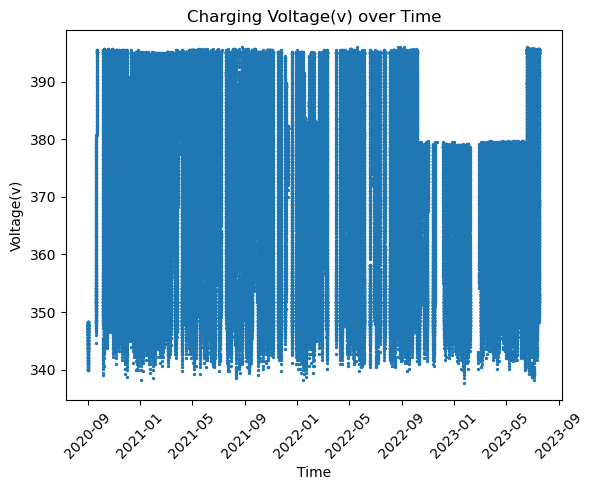

In [7]:
#parking charging voltage
parking_charge_data = split_data[split_data['Charging State'] == 'Parking charge'].copy()
plt.scatter(parking_charge_data['Sending Time'], parking_charge_data['Total Voltage'],s=2)
plt.title('Charging Voltage(v) over Time')
plt.xlabel('Time')
plt.ylabel('Voltage(v)')
plt.xticks(rotation=45)
plt.show()

In [8]:
range_v = parking_charge_data[parking_charge_data['Total Voltage'].between(345, 375, inclusive='both')]
range_v

VIN        Sending Time        Receive Time   
388     LVYPDBMDXMP201289 2020-09-02 19:41:40 2020-09-02 19:41:41  \
389     LVYPDBMDXMP201289 2020-09-02 19:42:10 2020-09-02 19:42:11   
390     LVYPDBMDXMP201289 2020-09-02 19:42:40 2020-09-02 19:42:41   
391     LVYPDBMDXMP201289 2020-09-02 19:43:10 2020-09-02 19:43:11   
392     LVYPDBMDXMP201289 2020-09-02 19:43:40 2020-09-02 19:43:41   
...                   ...                 ...                 ...   
277923  LVYPDBMDXMP201289 2023-07-17 22:13:13 2023-07-17 22:13:14   
277924  LVYPDBMDXMP201289 2023-07-17 22:13:43 2023-07-17 22:13:44   
277925  LVYPDBMDXMP201289 2023-07-17 22:14:13 2023-07-17 22:14:15   
277926  LVYPDBMDXMP201289 2023-07-17 22:14:43 2023-07-17 22:14:44   
277927  LVYPDBMDXMP201289 2023-07-17 22:15:13 2023-07-17 22:15:14   

       Reissue Report Vehicle State  Charging State Operation Mode   
388                no      Flameout  Parking charge  Pure electric  \
389                no      Flameout  Parking charge  Pure electric   
390                no      Flameout  Parking charge  Pure electric   
391                no      Flameout  Parking charge  Pure electric   
392                no      Flameout  Parking charge  Pure electric   
...               ...           ...             ...            ...   
277923             no      Flameout  Parking charge  Pure electric   
277924             no      Flameout  Parking charge  Pure electric   
277925             no      Flameout  Parking charge  Pure electric   
277926             no      Flameout  Parking charge  Pure electric   
277927             no      Flameout  Parking charge  Pure electric   

       Vehicle Speed(km/h)  Accumulated Mileage  Total Voltage  ...   
388                    0.0                  7.0          345.0  ...  \
389                    0.0                  7.0          345.0  ...   
390                    0.0                  7.0          345.0  ...   
391                    0.0                  7.0          345.0  ...   
392                    0.0                  7.0          345.0  ...   
...                    ...                  ...            ...  ...   
277923                 0.0              42833.0          374.2  ...   
277924                 0.0              42833.0          374.5  ...   
277925                 0.0              42833.0          374.5  ...   
277926                 0.0              42833.0          374.7  ...   
277927                 0.0              42833.0          375.0  ...   

        Voltage Vol Rechargeable System Number  Frame Start Cell Number   
388                                          1                     null  \
389                                          1                     null   
390                                          1                     null   
391                                          1                     null   
392                                          1                     null   
...                                        ...                      ...   
277923                                       1                     null   
277924                                       1                     null   
277925                                       1                     null   
277926                                       1                     null   
277927                                       1                     null   

       Voltage of Ress Total number of single cells in this frame   
388                345                                         96  \
389                345                                         96   
390                345                                         96   
391                345                                         96   
392                345                                         96   
...                ...                                        ...   
277923           374.2                                         96   
277924           374.5                        

### Filter continuous increasing charing event from 20% to 80% with time difference < 6 mins

In [9]:
# set a voltage charging range from 350 to 375
data_voltage_range = parking_charge_data[(parking_charge_data['Total Voltage'] >= 345) & (parking_charge_data['Total Voltage'] <= 375)].copy()

continuous_segments = []
current_segment = []

data_voltage_range['group_index'] = None

group_index = 0

for index, row in data_voltage_range.iterrows():
    soc = row['SOC(%)']
    voltage = row['Total Voltage']
    if not current_segment:
        if voltage == 345:
            current_segment.append(index)
        else:
            continue
    elif soc == data_voltage_range.loc[current_segment[-1], 'SOC(%)'] or soc == data_voltage_range.loc[current_segment[-1], 'SOC(%)'] +1:
        time_diff = (row['Sending Time'] - data_voltage_range.loc[current_segment[-1], 'Sending Time']).total_seconds()
        if time_diff > 360:
            current_segment=[]
            continue
        current_segment.append(index)
        if voltage == 375:
            data_voltage_range.loc[current_segment, 'group_index'] = group_index
            continuous_segments.append(current_segment)
            current_segment = []
            group_index += 1
    else:
        current_segment = []
df_range = pd.concat([data_voltage_range.loc[seg] for seg in continuous_segments])

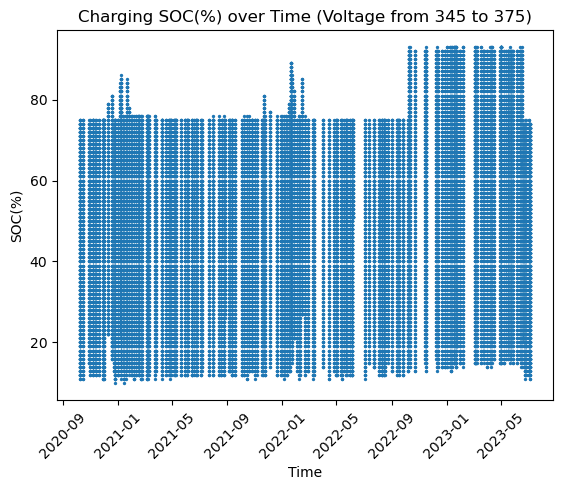

In [10]:
#parking charging voltage(345-375)
plt.scatter(df_range['Receive Time'], df_range['SOC(%)'],s=2)
plt.title('Charging SOC(%) over Time (Voltage from 345 to 375)')
plt.xlabel('Time')
plt.ylabel('SOC(%)')
plt.xticks(rotation=45)
plt.show()

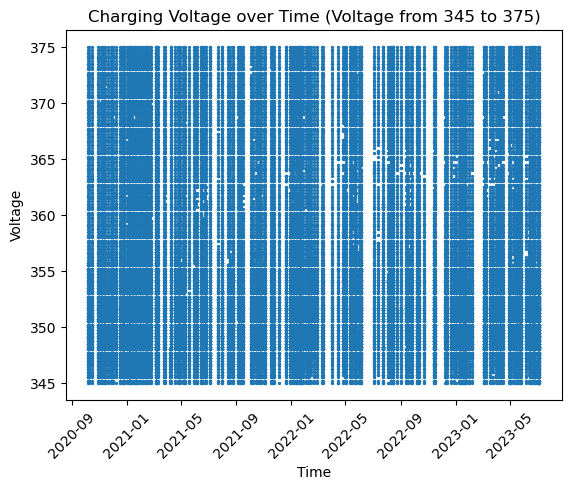

In [11]:
#parking charging voltage(345-375)
plt.scatter(df_range['Receive Time'], df_range['Total Voltage'],s=2)
plt.title('Charging Voltage over Time (Voltage from 345 to 375)')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.xticks(rotation=45)
plt.show()

In [12]:
import plotly.express as px

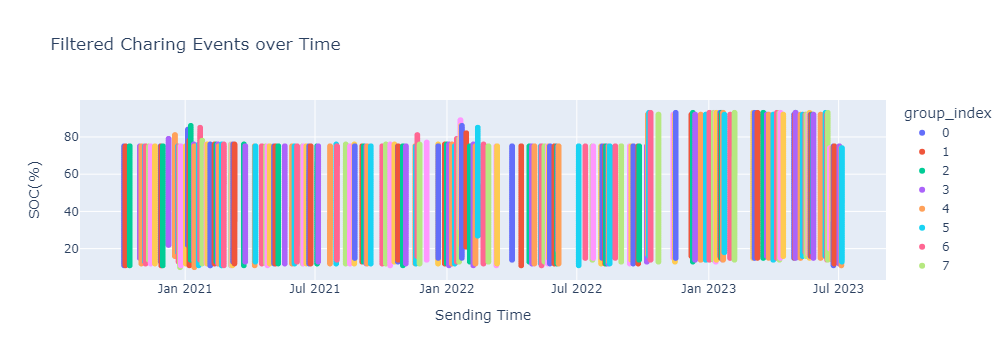

In [13]:
#parking charging Current( soc between 20-80)
df_range['Sending Time'] = pd.to_datetime(df_range['Sending Time'])
px.scatter(df_range,x='Sending Time',y='SOC(%)',color='group_index',title = 'Filtered Charing Events over Time')


In [14]:
def calculate_area(group_df):
    time_diff = ((group_df['Sending Time'].diff().dt.seconds)/3600).fillna(0)
    current_values = group_df['Total Current']
    Integral_area = ((current_values[:-1] + current_values[1:])/2*time_diff[1:]).sum()
    return Integral_area

In [15]:
area_per_group = df_range.groupby('group_index').apply(calculate_area)
start_per_group = df_range.groupby('group_index')['Sending Time'].min()
duration_group = (df_range.groupby('group_index')['Sending Time'].max() - df_range.groupby('group_index')['Sending Time'].min()).dt.total_seconds()/3600
current_group = df_range.groupby('group_index')['Total Current'].mean()

In [16]:
group_df = pd.DataFrame({'Start Time': start_per_group.values,
                         'Electric Charge(Ah)': area_per_group.values*-1,
                         'Charging Duration(hour)': duration_group.values,
                         'Average Current': current_group.values*-1})
group_df

Start Time  Electric Charge(Ah)  Charging Duration(hour)   
0   2020-10-07 18:56:57            16.747500                 1.958333  \
1   2020-10-09 17:27:12            16.123333                 1.908333   
2   2020-10-15 15:49:46            16.529167                 1.908333   
3   2020-10-29 17:37:48            15.811667                 1.825000   
4   2020-10-31 20:49:52            15.734167                 1.816667   
..                  ...                  ...                      ...   
201 2023-06-24 21:05:28            16.325833                 2.033333   
202 2023-07-01 21:48:52            16.719167                 1.991667   
203 2023-07-01 21:48:52            16.719167                 1.991667   
204 2023-07-04 20:10:03            16.531667                 1.983333   
205 2023-07-05 13:17:03            15.771667                 1.891667   

     Average Current  
0           8.585169  
1           8.480435  
2           8.696491  
3           8.703182  
4           8.698174  
..               ...  
201         8.060816  
202         8.428750  
203         8.428750  
204         8.370711  
205         8.371053  

[206 rows x 4 columns]

### Total 205 Charging Event and Capacity

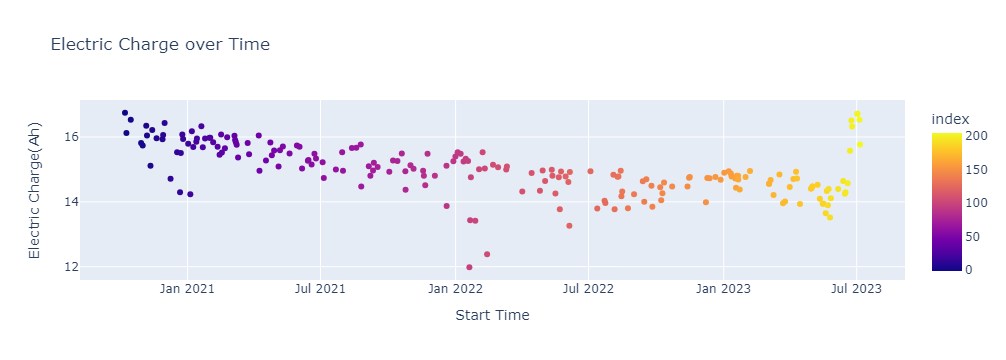

In [17]:
#charing capacity for all filtered charging event
px.scatter(group_df,x='Start Time',y='Electric Charge(Ah)',
           color = group_df.index,
           title = 'Electric Charge over Time')

In [18]:
#check outlier group_98
group_98 = df_range[df_range['group_index'] == 98].copy()
px.line(group_98,'Receive Time','Total Current',title='Group 98 Charging Event')


In [19]:
#check outlier group_98
group_103 = df_range[df_range['group_index'] == 103].copy()
px.line(group_103,'Receive Time','Total Current',title='Group 103 Charging Event')

In [29]:
filter_capacity = []
for index, row in group_df.iterrows():
    if index == 0:
        filter_capacity.append(index)
    else:
        capacity = row['Electric Charge(Ah)']
        diff = abs(capacity - group_df.iloc[filter_capacity[-1]]['Electric Charge(Ah)'])
        if diff > 1:
            continue
        filter_capacity.append(index)
        
group_exclusion = group_df.iloc[filter_capacity].copy().reset_index()
group_exclusion['SOH(%)'] = group_exclusion['Electric Charge(Ah)']/group_exclusion.iloc[0]['Electric Charge(Ah)'] * 100
group_exclusion['Days'] = (group_exclusion['Start Time'] - group_exclusion.iloc[0]['Start Time']).dt.days
group_exclusion

index          Start Time  Electric Charge(Ah)  Charging Duration(hour)   
0        0 2020-10-07 18:56:57            16.747500                 1.958333  \
1        1 2020-10-09 17:27:12            16.123333                 1.908333   
2        2 2020-10-15 15:49:46            16.529167                 1.908333   
3        3 2020-10-29 17:37:48            15.811667                 1.825000   
4        4 2020-10-31 20:49:52            15.734167                 1.816667   
..     ...                 ...                  ...                      ...   
178    194 2023-06-05 19:31:12            14.395833                 1.708333   
179    195 2023-06-12 16:42:36            14.641667                 1.733333   
180    196 2023-06-14 21:10:27            14.249167                 1.708333   
181    197 2023-06-15 20:40:09            14.298333                 1.716667   
182    198 2023-06-18 18:31:37            14.573333                 1.816667   

     Average Current      SOH(%)  Days  
0           8.585169  100.000000     0  
1           8.480435   96.273076     1  
2           8.696491   98.696323     7  
3           8.703182   94.412101    21  
4           8.698174   93.949346    24  
..               ...         ...   ...  
178         8.465534   85.958103   971  
179         8.488038   87.425984   977  
180         8.381553   85.082351   980  
181         8.372464   85.375927   981  
182         8.036986   87.017963   983  

[183 rows x 7 columns]

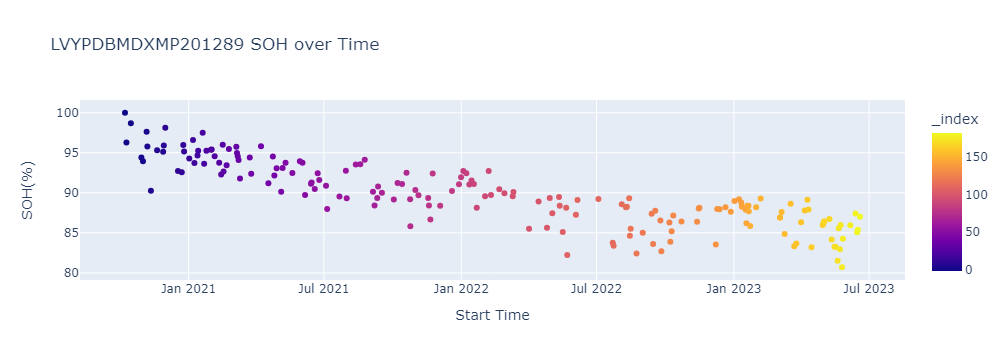

In [81]:
# capacity percentage over time
px.scatter(group_exclusion,x='Start Time',y='SOH(%)',color=group_exclusion.index,
           title = 'LVYPDBMDXMP201289 SOH over Time')

In [60]:
import boto3
import pandas as pd
import io

s3 = boto3.resource('s3')
bucket_name = 'apacdlcdc-rms-ted-sample'
file_key = 'lifecycle/LVYPDBMDXMP201289-DRO.csv'
df1 = pd.read_csv(f's3://{bucket_name}/{file_key}')
df1

Time  SOH(%)
0    9/1/2020 9:00  100.00
1   9/21/2020 9:49  100.00
2  7/25/2021 10:48   91.96
3  2/27/2022 10:05   89.56
4  2/27/2022 11:15   89.56
5  9/22/2022 10:37   87.77
6  10/7/2022 13:59   87.77
7    6/4/2023 9:33   85.32
8  6/17/2023 17:09   85.32
9  6/18/2023 10:03   85.40

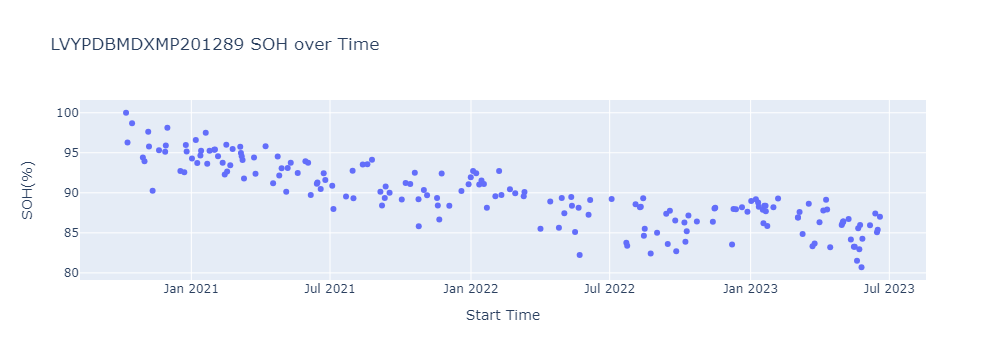

In [74]:
#parking charging Current( soc between 20-80)
df1['Time'] = pd.to_datetime(df1['Time'])


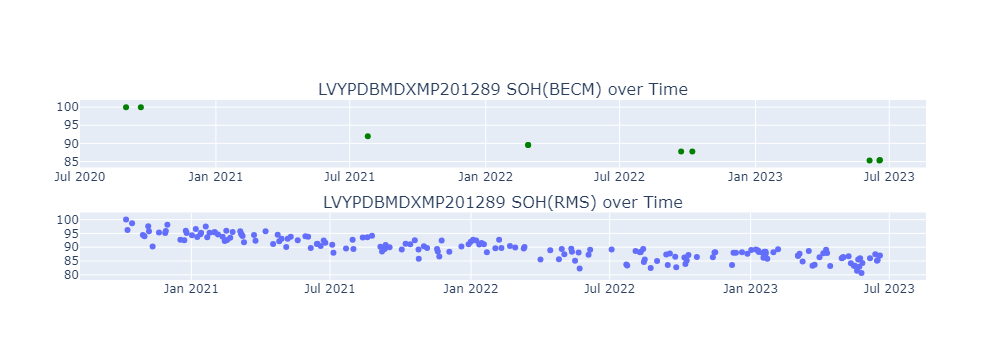

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 创建子图布局
fig = make_subplots(rows=2, cols=1, subplot_titles=('LVYPDBMDXMP201289 SOH(BECM) over Time', 'LVYPDBMDXMP201289 SOH(RMS) over Time'))

# 添加第一个散点图到第一行
scatter1 = px.scatter(df1, x='Time', y='SOH(%)', color_discrete_sequence=['green'])
for trace in scatter1.data:
    fig.add_trace(trace, row=1, col=1)

# 添加第二个散点图到第二行
scatter2 = px.scatter(group_exclusion, x='Start Time', y='SOH(%)')
for trace in scatter2.data:
    fig.add_trace(trace, row=2, col=1)

# 显示图形
fig.show()


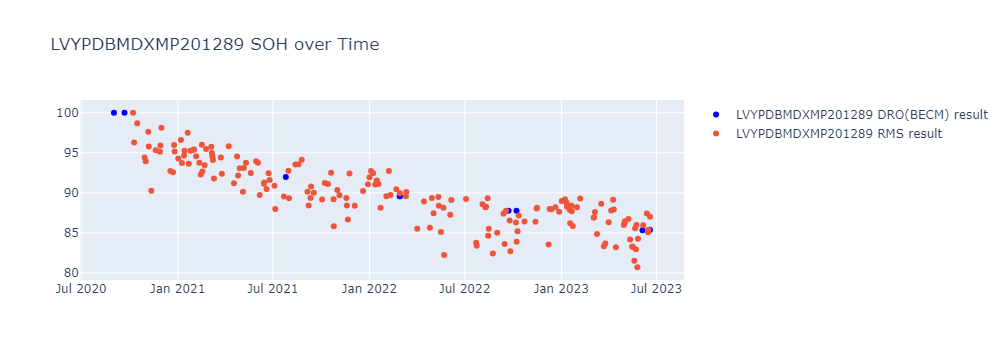

In [79]:
import plotly.graph_objects as go

# 创建图形
fig = go.Figure()

# 添加第一组数据的散点图
fig.add_trace(go.Scatter(x=df1['Time'], y=df1['SOH(%)'], mode='markers', marker=dict(color='blue'), name='LVYPDBMDXMP201289 DRO(BECM) result'))

# 添加第二组数据的散点图
fig.add_trace(go.Scatter(x=group_exclusion['Start Time'], y=group_exclusion['SOH(%)'], mode='markers', name='LVYPDBMDXMP201289 RMS result'))

# 设置图形的标题
fig.update_layout(title='LVYPDBMDXMP201289 SOH over Time')

# 显示图形
fig.show()


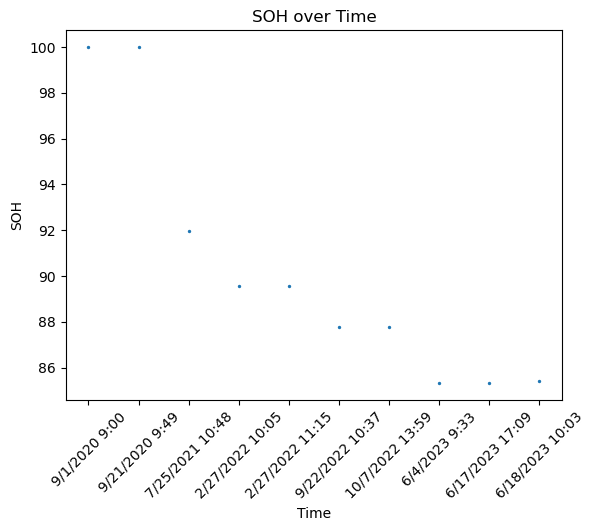

In [61]:
#parking charging voltage(345-375)
plt.scatter(df1['Time'], df1['SOH(%)'],s=2)
plt.title('SOH over Time')
plt.xlabel('Time')
plt.ylabel('SOH')
plt.xticks(rotation=45)
plt.show()

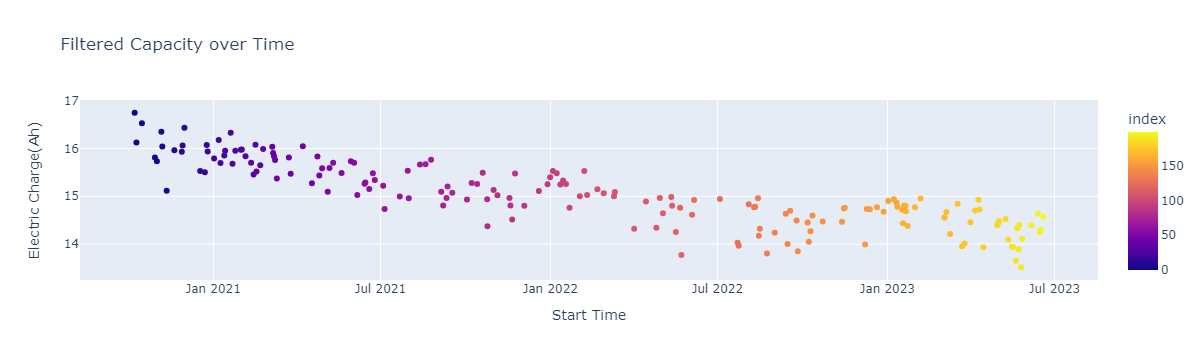

In [81]:
# average current value over time
px.scatter(group_exclusion,x='Start Time',y='Electric Charge(Ah)',color=group_exclusion.index,
           title = 'Filtered Capacity over Time')

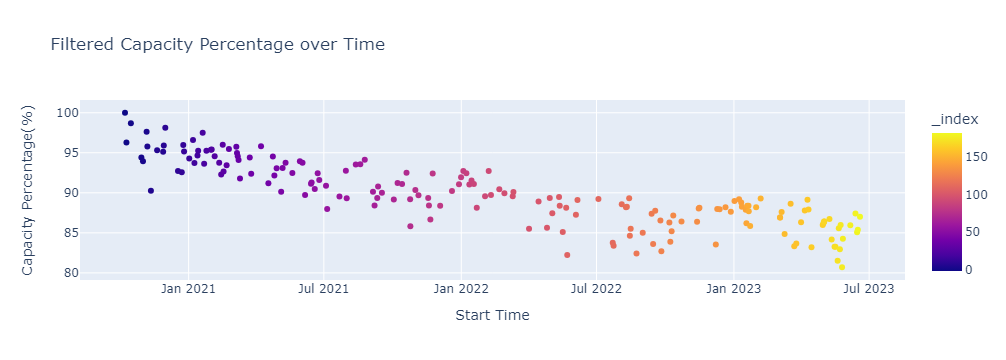

In [22]:
# capacity percentage over time
px.scatter(group_exclusion,x='Start Time',y='Capacity Percentage(%)',color=group_exclusion.index,
           title = 'Filtered Capacity Percentage over Time')

In [142]:
from sklearn.linear_model import LinearRegression
chosen_intercept = 100
model = LinearRegression()
model.fit(group_exclusion['Days'].values.reshape(-1, 1),group_exclusion['Capacity Percentage(%)'].values.reshape(-1,1))
slope = model.coef_[0]
intercept = model.intercept_

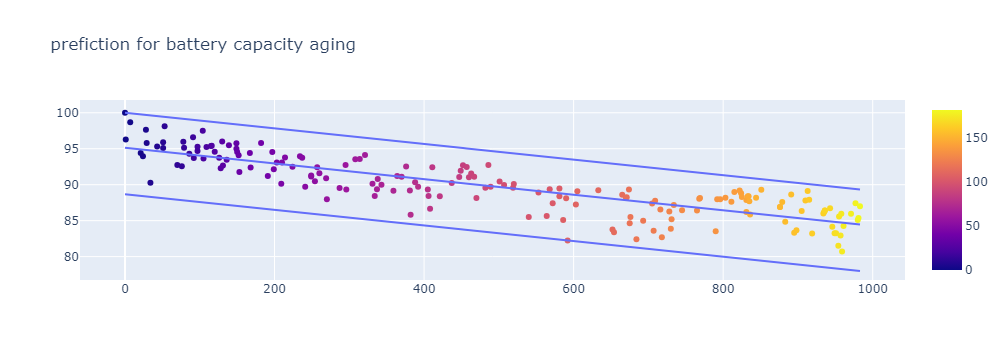

In [151]:
import plotly.graph_objects as go

def myfunc(x):
  return slope * x + chosen_intercept

mymodel = myfunc(group_exclusion['Days'].values)
pred = slope * group_exclusion['Days'].values + intercept
low = slope * group_exclusion['Days'].values - group_exclusion.iloc[108]['Days']*slope + group_exclusion.iloc[108]['Capacity Percentage(%)']

fig1 = px.scatter(x=group_exclusion['Days'], y=group_exclusion['Capacity Percentage(%)'],color =group_exclusion.index )
fig2 = px.line(x=group_exclusion['Days'], y=mymodel)
fig3 = px.line(x=group_exclusion['Days'], y=pred)
fig4 = px.line(x=group_exclusion['Days'], y=low)

fig5 = go.Figure(data=fig1.data + fig2.data +fig3.data + fig4.data)
fig5.update_layout(
    title='prefiction for battery capacity aging'
)
fig5.show()